# Experiments on Baseline model

## Feature extraction

### Image vectorisation
Images are vectorised using the penultimate layer of Keras Xception model <cite data-cite="chollet2017">(Chollet, 2013)</cite> pre-trained on imagenet <cite data-cite="deng2009">(Deng et al., 2009)</cite>.

In [212]:
from src.preprocessing.preprocess_dataset import extract_all
from tensorflow.keras.preprocessing.image import load_img
from os.path import abspath, splitext
from os import listdir
import pandas as pd
import tensorflow_hub as hub
from src.utils.file_utils import save_as_pickle

In [22]:
extract_all("xception", "data/train_images/", "data/features/xception.pkl.train")

/home/lb732/Projects/memotion_analysis/.venv/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


KeyboardInterrupt: 

In [ ]:
extract_all("xception", "data/dev_images/", "data/features/xception.pkl.dev")

## Sentences vectorisation
Text of memes are vectorised using pretrained Universal sentence encoding <cite data-cite="cer2018">(Cer et al., 2018)</cite>. The dataset of training is not specified nor open sourced by the authors. 

In [175]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [185]:
def extract_embeddings(model, sents, img_ids, save_file):
    embeddings = model(sents)
    features = {}
    for i, (embed, sent, img_id) in enumerate(zip(embeddings, sents, img_ids)):
        print("{}\t{}\t\t{}".format(i, sent, img_id))
        features[img_id] = embed
    save_as_pickle(features, save_file)

In [186]:
def extract_sentences_and_ids(dataset_path):
    df = pd.read_csv(dataset_path)
    sents = df["Corrected_text"]
    img_ids = df["image_name"].apply(lambda x: splitext(x)[0])
    return sents, img_ids

In [187]:
train_sents, train_img_ids = extract_sentences_and_ids("data/train_text_cleaned_final.csv")
extract_embeddings(use, train_sents, train_img_ids, "data/features/use.pkl.train")

0	LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK		10_year_2r94rv
1	The best of #10 YearChallenge! Completed in less the 4 years. Kudus to @narendramodi ji 8:05 PM - 16 Jan 2019 from Mumbai  India		10_year_10-year-challenge_1547788782
2	Sam Thorne @Strippin ( Follow Follow Saw everyone posting these 2009 vs 2019 pics so here's mine 6:23 PM - 12 Jan 2019 O 636 Retweets 3 224 LIKES 65 636		10_year_10yearchallenge-5c75f8b946e0fb0001edc739
3	10 Year Challenge - Sweet Dee Edition		10_year_10-year-challenge-sweet-dee-edition-40184302
4	10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious 10 Year Challenge Memes | What is #10 Year Challenge?		10_year_10-year-challenge-with-no-filter-47-hilarious-10-year-42949168
5	1998: Don't get in car with strangers 2008: Don't meet people from the internet alone.  2019: UBER.. Order yourself a stranger from the internet to get into a car with alone.		10_year_10-years-challenge-about-humanity_o_7260933
6	10 years chal

1011	STEVE HARVEY SHOULD HOST THE OSCARS MAYBE LEONARDO DICAPRIO WILL WIN ONE OMG YES.		decaprio_steve-harvey-should-host-the-oscars-maybe-leonardo-dicaprio-will-11429368
1012	THANKS EVERYONE VIA  I HAVE BEEN PRACTICING MY SPEECH FOR 12 YEARS ALREADY		decaprio_thanks-everyone-leonardo-dicaprio-memes
1013	THAT MOMENT YOU REALIZE THAT THIS IS LEONARDO DICAPRIO AND JOHNNY DEPP		decaprio_that-moment-you-realize-that-this-is-leonardo-dicaprio-and-5883632
1014	HAVE YOU EVER BEEN REVISING YOUR FINALS		decaprio_then-you-reach-a-point-where-you-say-fuck-this-shit-dicaprio-wall-street-wolf
1015	This is Billy Milligan. He had 24 personalities sharing 1 body.. Leonardo DiCaprio will be playing his character in his next movie.		decaprio_this-is-billy-milligan-he-had-24-personalities-sharing-1-8000683
1016	THIS LEO WITH BEARD  WON THE OSCAR meme Nepal NOW THE TIME IS FOR THIS LEO WITH BEARD TO WIN  #CopaAmericaFinal2016		decaprio_this-leo-with-beard-won-the-oscar-meme-nepal-know-2923518
1017	I WISH 

2454	WHO DA MAN?! Gandalf! Who said that?		lor_bffb797cbd3041fb879b938b2cc2f1f0
2455	Bilbo Tells Gollum... There is No Santa Claus.		lor_bilbo-tells-lotr-memes
2456	ONE DOES NOT SIMPLY GET OFF THE INTERNET		lor_boromir-meme-lord-of-the-rings-meme-e1336334496486
2457	BATH ROBES THE PERFECT ATTIRE FOR AN UNEXPECTED JOURNEY		lor_c0b
2458	MATT FONTANE LIKES LORD OF THE RINGS MEMES		lor_c15cfc5d571f27b00fb2be77e678baf5a03d0dbea1d115f24eb9a0b8467131b8
2459	IM SORRY I CANT HEAR YOU VIA  OVER THE SOUND OF MY FABULOUSNESS		lor_ce35f51fdd7e411fb3bf27abb02bd40f
2460	WE WILL GO THROUGH THE MINES Gandalf		lor_Cheezburger-Image-9259709696
2461	- It is not our fight - Are we not part of this world? - No  we are not even in the book!		lor_dc3e31772bb89d1f41df993f28f33d9b--legolas-funny-lotr-memes-legolas
2462	I'm never late		lor_de0f0cbdbf4414efe6dd17edde3bf936a33b7978f105b503aad9c127690c5809
2463	I rewatched the Lord of the Rings trilogy last weekend. Yes. In one day. I'm no pansy. Anyway. I had two 

3719	LOYALTY IS RARE. CHERISH IT. INSTAGRAM | UPSCALEQUOTES		spector_DiLk_-8XcAA3Y5-
3720	CRITICIZE ME WHEN YOU ARE AT MY LEVEL UNTIL THEN YOU MAY JUST ADMIRE . Instagram		spector_feec779efa614757b629f2331ac4d4d7--ps
3721	loyalty is a two way street. if i'm asking for it from you		spector_loyalty-is-a-two-way-street-if-im-asking-for-11022495
3722	HARVEY SPECTER		spector_moments-from-episode-that-you-need-to-see-top-Harvey-Specter-Quotes-Calendar-moments-from-suits-season-episode-that-you-need-to
3723	CLASSY IS WHEN YOU HAVE A LOT TO SAY BUT YOU CHOOSE TO REMAIN SILENT IN FRONT OF FOOLS.		spector_truth-waste-of-your-time-and-breath-positive-thoughts-deep-Eea41652d20b769fab8fa134c7f68f65d
3724	YOU KNOW WHO CRIES THE HARDEST IN THE MISS AMERICA PAGEANT? THE WINNER. BECAUSE SHE KNOWS SHE CAN'T WIN AGAIN AND WINNERS ALWAYS WANT TO THE APPJUICE		spector_When-you-recommend-a-junior-for-your-college-clubsociety-and-he-makes-a-bad-first-impression.-13
3725	Winners don't make excuses -Harvey Spe

5287	I'm here. You're here.		spector_2fat66
5288	Country Music. Country Music Everywhere Memes		country_DOOUVqzX4AApKf7
5289	What if I told you that every hour it's 4:20 somewhere in the world		morpheus_420-somewhere
5290	Harry Potter... HE DOESN'T EVEN GO HERE!		harry_harry-potter-memes-harry-potter-hunger-games-E2ta0U
5291	Jim Carrey @Jim Carrey No holiday should manipulate you to the point where you're going into debt just to show someone you love them. This!! 100		jim_jim-carrey-jimcarrey-no-holiday-should-manipulate-you-to-the-29801079
5292	CHUCK NORRIS NEVER COMPLETES CUSTODIAN INTERVIEW FORMS BECAUSE CHUCK NORRIS NEVER SUBMITS @exterro		chuck_chuck-norris-meme
5293	I DON'T UNDERSTAND COMPUTERS BUT I HAVE CANCER  SO YOLO		stevejobs_rBgwJOW
5294	THE DIFFERENCE BETWEEN GIRLFRIEND AND GIRL FRIEND IS THAT LITTLE SPACE IN BETWEEN WE CALL THE FRIEND ZONE		friends_2cbat2
5295	This how your girl sits and stares at you when you're telling her a story that involves any other female		gf_d4d

6426	I ACCEPT THAT WAS MY MISTAKE PLEASE DON'T TELL ANYONE		harry_serveous-snape-memes
6427	STARTED FROM THE BOTTOM NOW I'M HERE		harry_sub-buzz-2211-1490369189-3-CSX4kX
6428	Hogwarts is my home! Are you reading Harry Potter again?		harry_sub-buzz-8915-1490383645-2png-c06GwD
6429	White House staff's reaction to Trump's first visit looks like when Voldemort showed up after the battle of Hogwarts		harry_tumblrogiaotthyv1v1kb0to1540jpg
6430	NEVILLE LONGBOTTOM: MASTER OF THE PUBERTY SPELL		harry_tumblr_mfz4n9bW5G1rjyoxyo1_400
6431	So unlucky I wasn't here. I know exactly the countercurse that could have spared her. Bitch please.		harry_wIQ9wcF
6432	10 FAMILY FEUD US ANSWERS That Left STEVE HARVEY SPEECHLESS!		harvey_10-family-feud-us-answers-that-left-steve-harvey-speechless-47697997
6433	PSYCH  YOU ARE YHE FATHER maury maury SOBASICICANTEVEN MR_MUN		harvey_12383289_1539723533013778_1822331945_n
6434	I'VE WATCHED THE WALKING DEAD ENOUGH TO KNOW HOW TO REALLY PREPARE FOR SURVIVAL TAKE HALF 

In [188]:
dev_sents, dev_img_ids = extract_sentences_and_ids("data/dev_text_cleaned_final.csv")
extract_embeddings(use, dev_sents, dev_img_ids, "data/features/use.pkl.dev")

0	ISAW DAD WITH MOM LASTNIGHT I THINK HE WAS STEALING MY MILK.		skeptical_stealing-my-milk
1	HOW AM I STILL BREATHING IF SHE HAS MY NOSE?		skeptical_breathing+if+she+has+my+nose
2	YOU MEAN TO TELL ME BIGG BOSSIS BETTER THAN KBC!!! The original photo		skeptical_603b3553d88441537f6c65abac8a1cec
3	MY SHARE OF THE NATIONAL DEBT IS HOW MUCH?		skeptical_e17ae5f069b21df5599460939047d4ae8db9852ea6ce2c277c15eeea6f7928ef
4	WAIT A SECOND BILLA AM I SKEPTICAL BABY GROWN UP?  XD		skeptical_75c34fa1-4d2b-45c1-9bda-5ff0f15d241e
5	LOVES A BAND DOESN'T PAY FOR THEIR MUSIC		skeptical_steve-5c00540f46e0fb00018941d4
6	You mean to tell me spoons don't actually sound like airplanes?		skeptical_59921
7	YOU PUT YOUR WHAT IN HER WHAT?		skeptical_iqtkv
8	YOU THINK I'M GONNA EAT VEGTABLES? made on imgur Skeptical baby - Meme on Imgur		skeptical_vegtables-made-on-imgur-skeptical-baby-meme-on-imgur-54337431
9	I'M SMART JUST ASK ME		skeptical_1p65xn
10	BITCH HOW DA HELL SHE LIKE YOU YOUR A ASSHOLE Make your Meme at

## Visualisation of labels distribution

In [109]:
from sklearn.manifold import TSNE
from src.utils.file_utils import load_pickle_file
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [38]:
df_train = pd.read_csv("data/train_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

In [39]:
df_dev = pd.read_csv("data/dev_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

### Image

In [194]:
img_embeddings = load_pickle_file("data/features/xception.pkl.train")

In [195]:
img_embed = list(img_embeddings.values())

In [196]:
img_embed = np.array(img_embed)
img_embed = img_embed.reshape((img_embed.shape[0],img_embed.shape[2]))
img_embed.shape

(6999, 1000)

In [197]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(img_embed)

In [71]:
df_train["tsne_x"] = X_tsne[:,0]
df_train["tsne_y"] = X_tsne[:,1]

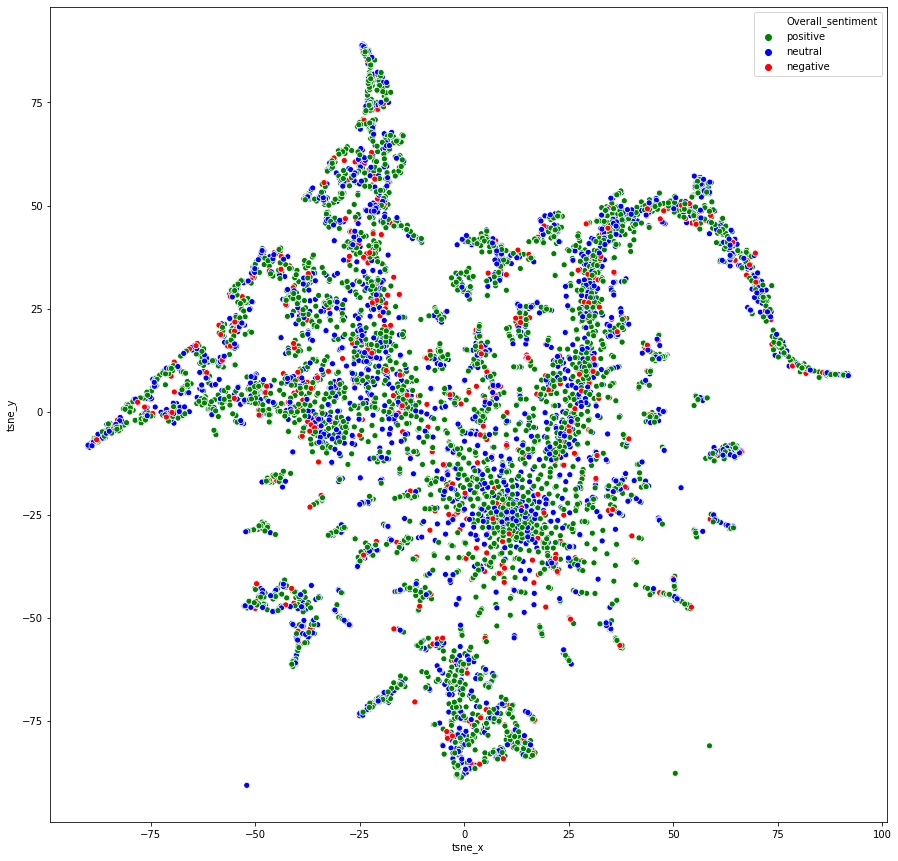

In [77]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

In [95]:
df_train["Sarcasm"].unique()

array(['general', 'not_sarcastic', 'twisted_meaning', 'very_twisted'],
      dtype=object)

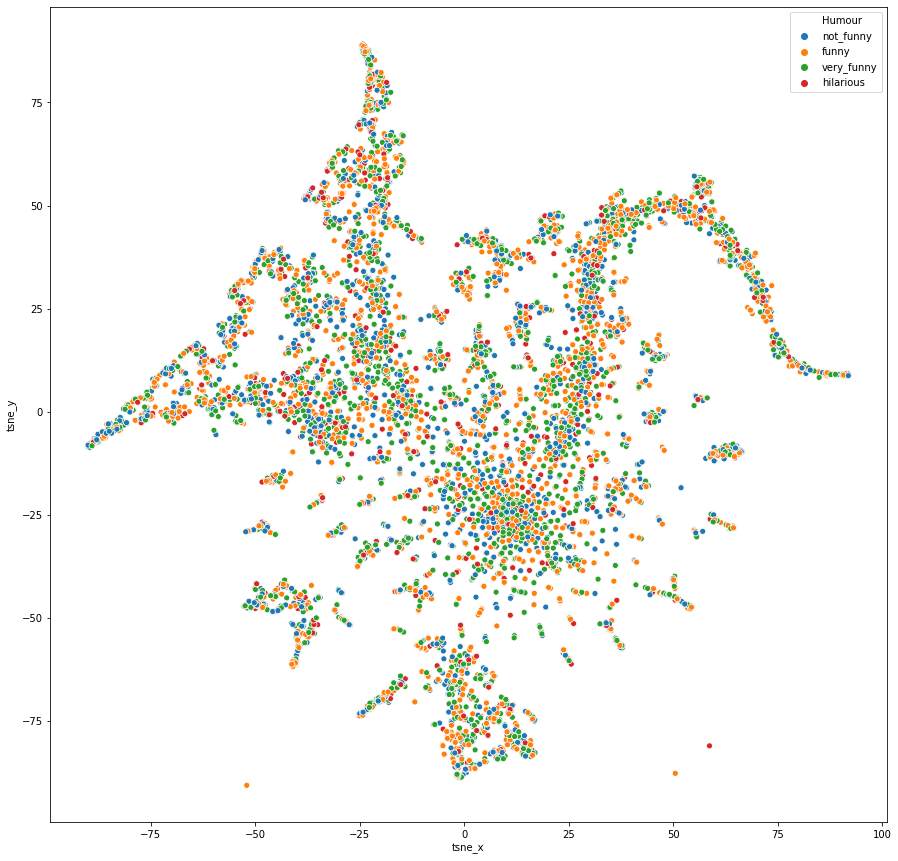

In [92]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

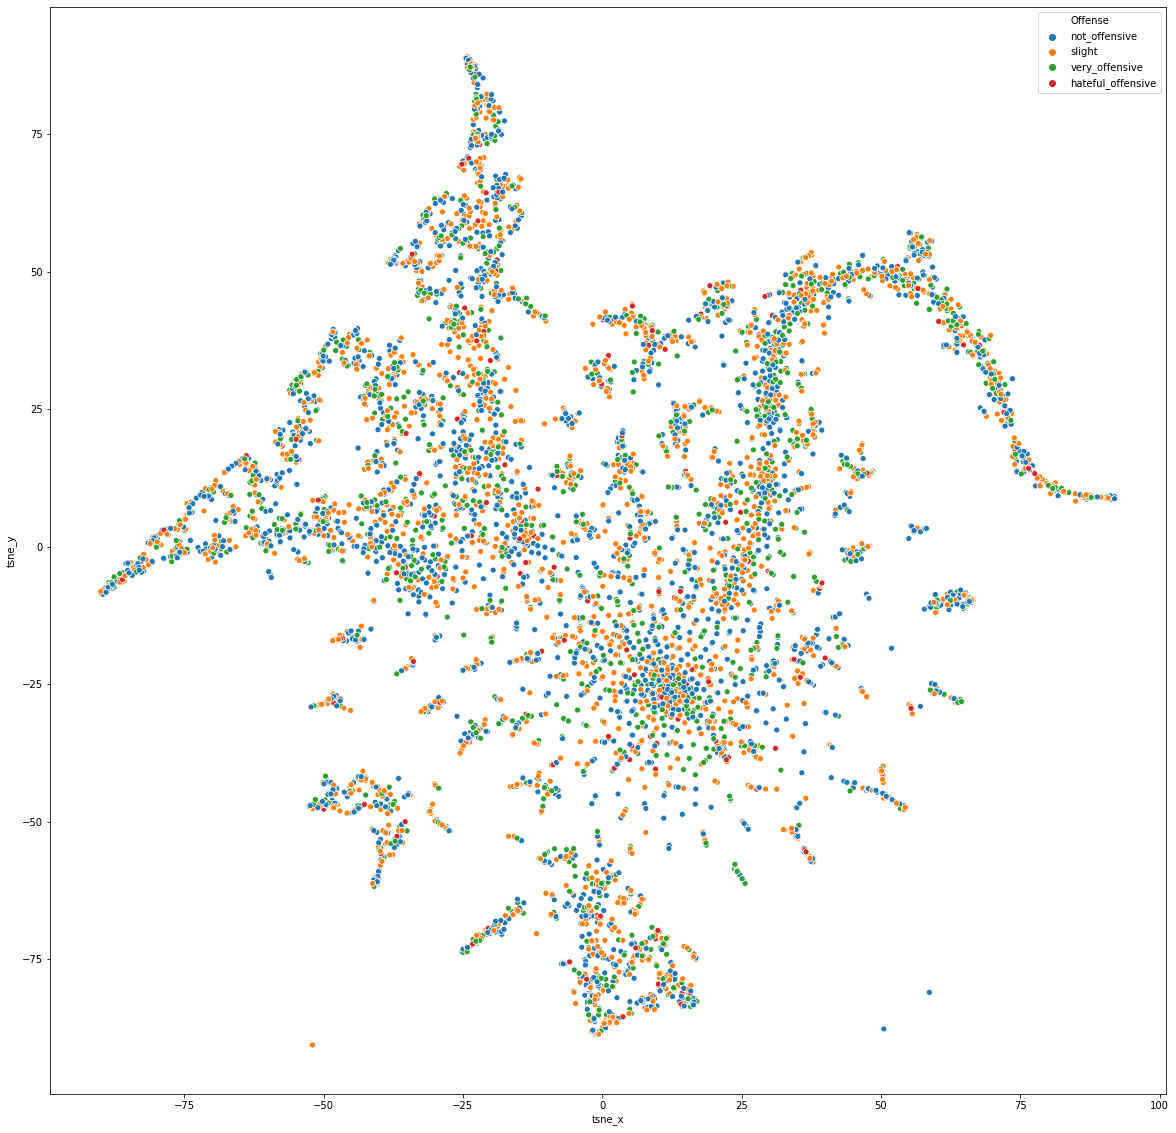

In [94]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

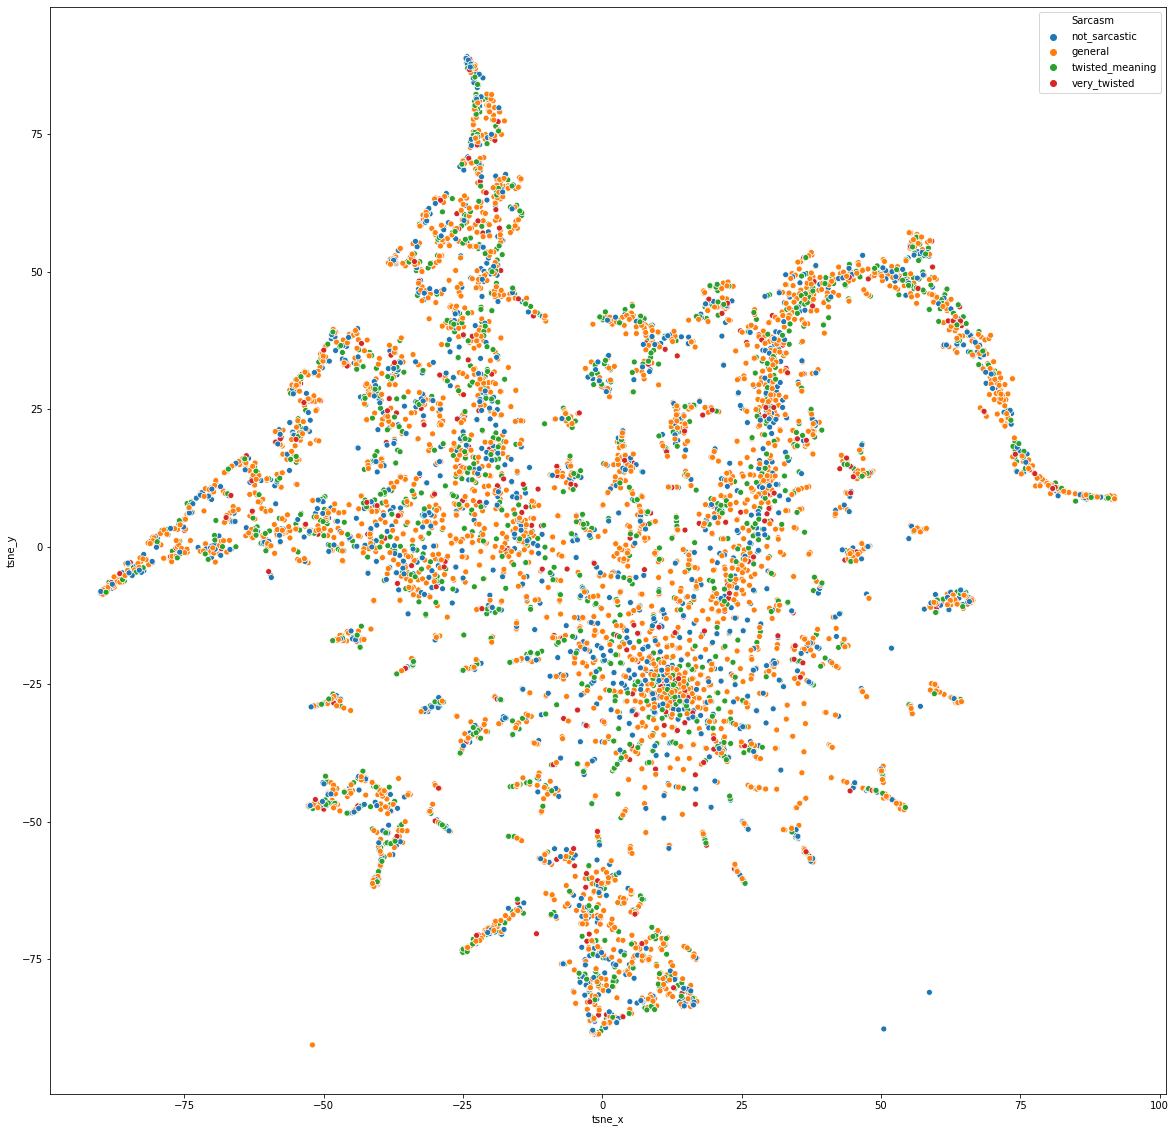

In [98]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

### Text

In [198]:
sent_embeddings = load_pickle_file("data/features/use.pkl.train")

In [199]:
# For an unknown reason mapping numpy conversion to all tensors with list.map or during pickle save
# remove some of the entries so I use loop instead to prevent entries removal

img_ids = df_train["image_name"].apply(lambda x: os.path.splitext(x)[0])
sent_embed = []
for i, img_id in enumerate(img_ids):
    e = sent_embeddings[img_ids[i]].numpy()
    sent_embed.append(e)
sent_embed = np.array(sent_embed)

In [200]:
sent_embed.shape

(6999, 512)

In [192]:
df_train["tsne_x"] = X_tsne[:,0]
df_train["tsne_y"] = X_tsne[:,1]

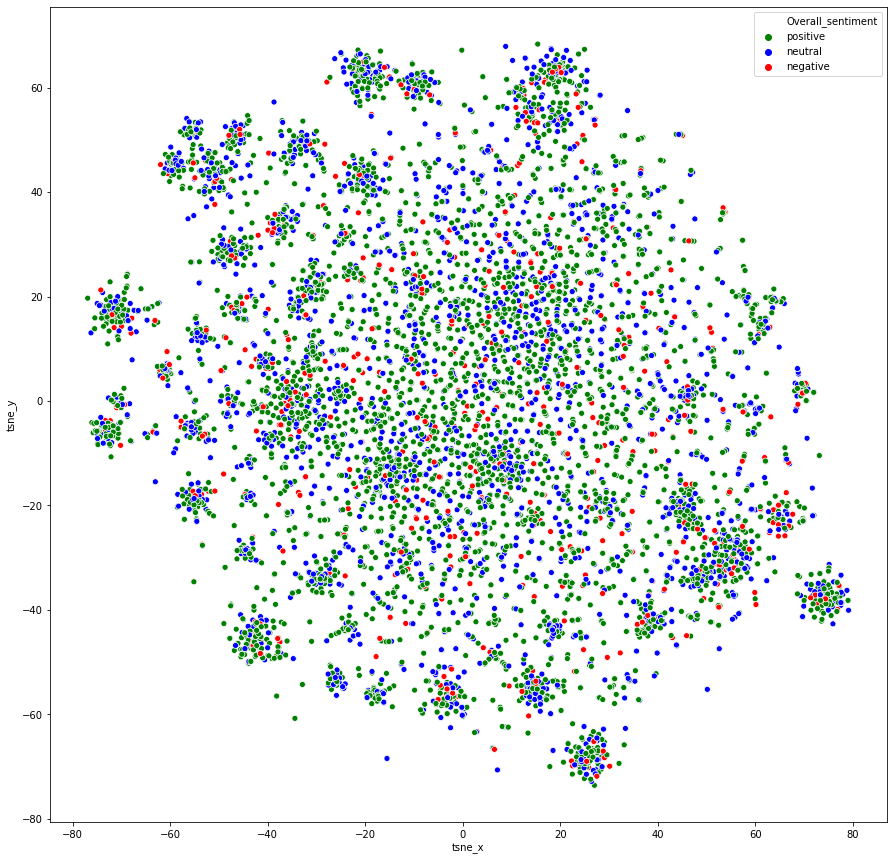

In [193]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

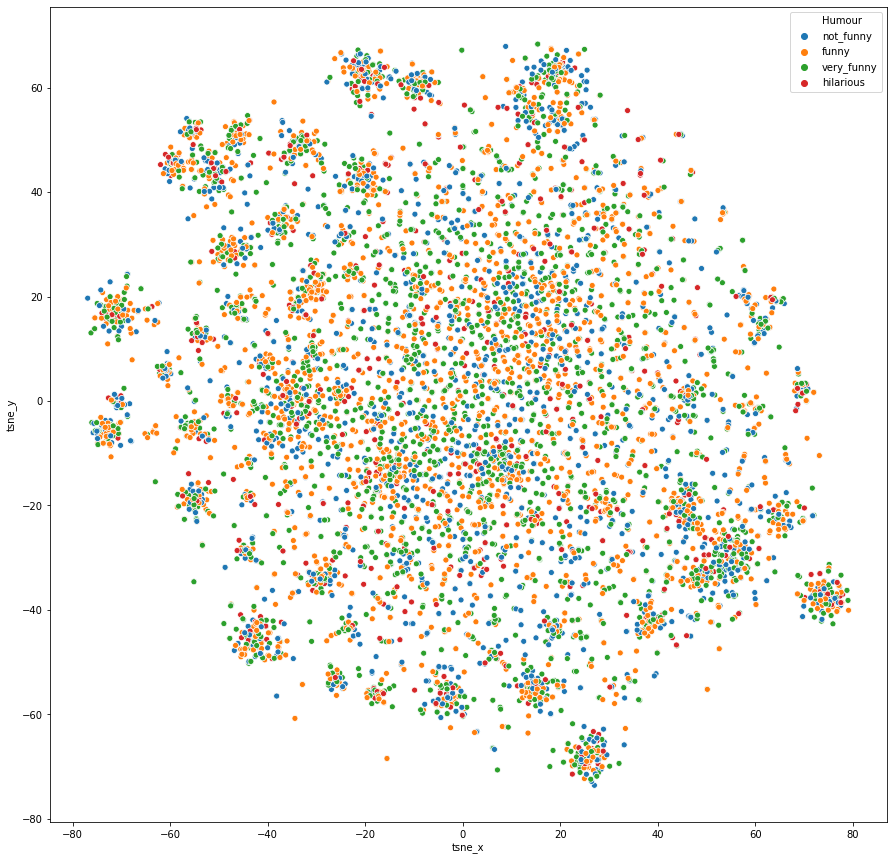

In [172]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

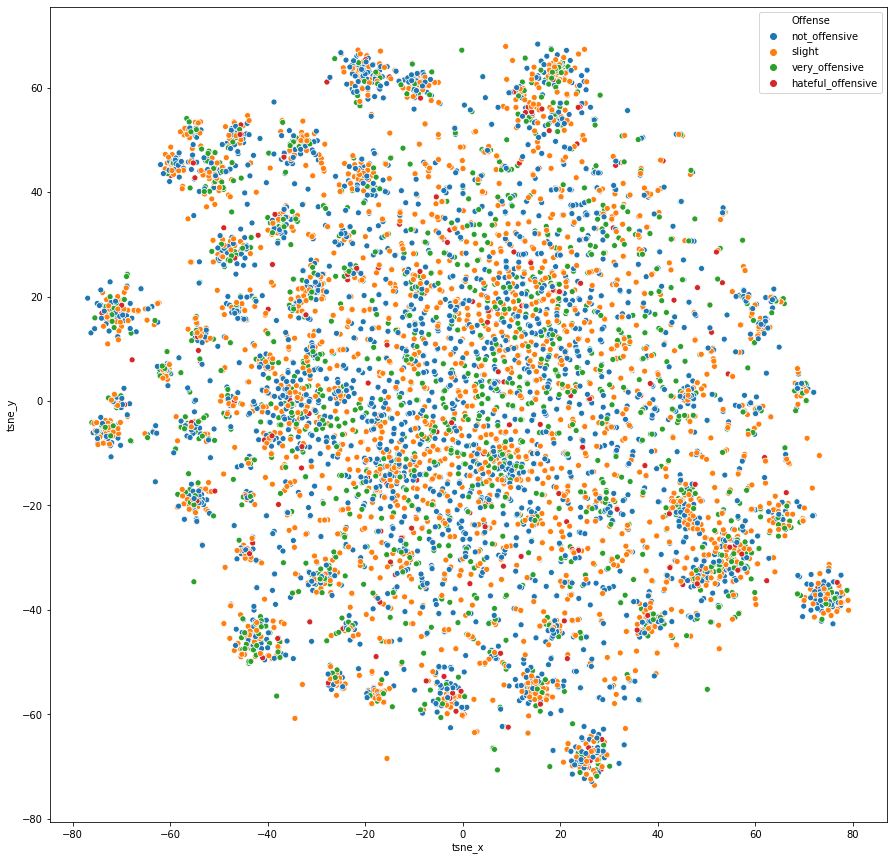

In [173]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

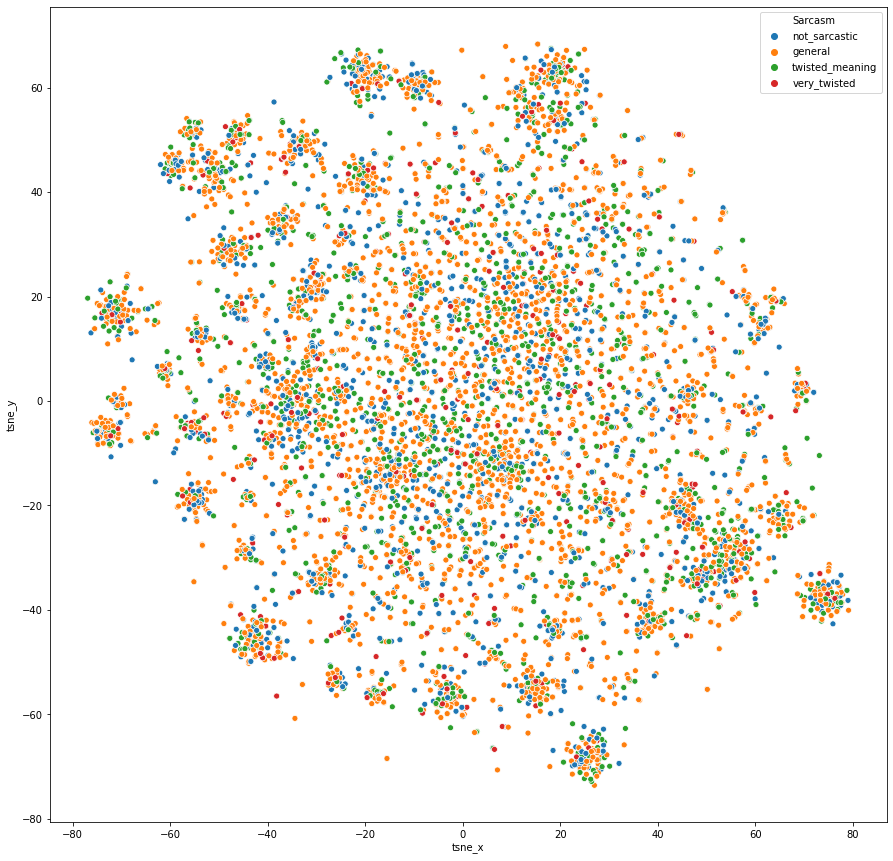

In [174]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

## Fusion of text and image vectors

### CCA

In [211]:
from src.models.cca import compute_cca

In [205]:
cca_res = compute_cca(img_embed, sent_embed)

In [206]:
cca_res

{'svd': (array([[-3.4497317e-02, -1.7118538e-02, -2.5360448e-02, ...,
          -8.9350278e-03, -4.9283139e-02,  2.0232769e-02],
         [ 1.0650723e-02, -4.8900280e-02, -2.1251910e-03, ...,
          -1.5289479e-02, -3.6140885e-02,  1.1305189e-02],
         [ 1.0889131e-02, -4.3091565e-02, -2.3652036e-02, ...,
          -1.5089043e-02, -1.5957452e-02, -5.7640404e-02],
         ...,
         [-5.7222461e-04,  2.9541531e-03, -2.8806005e-03, ...,
           8.4537691e-01, -1.6709147e-02, -4.5791585e-03],
         [ 2.6404601e-02, -1.2042199e-02,  7.8299791e-03, ...,
          -9.8068137e-03,  3.8701159e-01,  1.8741036e-02],
         [ 4.5864891e-02,  3.9109425e-03,  1.2874549e-02, ...,
          -4.3646228e-03,  1.8076727e-02,  4.4808206e-01]], dtype=float32),
  array([0.5849736 , 0.57417816, 0.5681676 , 0.5610891 , 0.55775094,
         0.5542935 , 0.54990625, 0.54763275, 0.54626673, 0.5432987 ,
         0.54086745, 0.53784704, 0.5365304 , 0.5346394 , 0.5342247 ,
         0.5332354 , 0.

### Concatenation

In [208]:
baseline_concat = np.concatenate((sent_embed, img_embed), axis=1)

## Task A: sentiment polarity detection
Classify memes as negative, neutral or positive. More details here: https://competitions.codalab.org/competitions/20629

## Task B: multi-label humour classification
Classify memes as offensive and/or humourous and/or sarcastic. If a meme belongs to neither of these class, it should be classified as other.
More details here: https://competitions.codalab.org/competitions/20629

## Task C: multi-label humour intensity classification
Classify the intensity of the class of humour listed in task B from 0 = "not at all" to 3 = "very".
More details here: https://competitions.codalab.org/competitions/20629